In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, plot_confusion_matrix, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
news_data = pd.read_csv("news_final.csv", index_col = 0)

# ***Modeling based on Title***

In [116]:
X_train,X_test,y_train,y_test = train_test_split(news_data['title'], news_data['label'], test_size = 0.2, stratify = news_data['label'], random_state = 7)

In [117]:
vectorizer = TfidfVectorizer(stop_words='english')

In [118]:
train_vec = vectorizer.fit_transform(X_train)
test_vec = vectorizer.transform(X_test)

## Decision Tree

### Default Params

In [119]:
decision_tree = DecisionTreeClassifier(random_state = 7)  

In [120]:
decision_tree.fit(train_vec, y_train)   
y_pred = decision_tree.predict(test_vec)

In [121]:
print("Default F1 Score:", f1_score(y_pred, y_test))
print("Default Accuracy Score:", accuracy_score(y_pred, y_test))

Default F1 Score: 0.9037696089908686
Default Accuracy Score: 0.9071606053761012


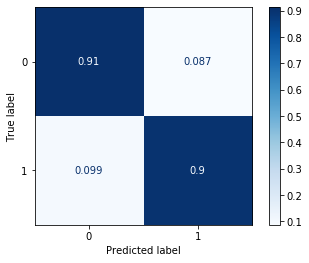

In [122]:
plot_confusion_matrix(decision_tree, test_vec, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

### Tuning and Cross Validation

In [33]:
param_grid = {'max_depth':np.arange(1,10),
              'max_features':np.arange(1,10),
              'min_samples_leaf':np.arange(1,10),
              'criterion':["gini", "entropy"]}

dec_tree_cv = GridSearchCV(decision_tree, param_grid, cv = 5, scoring='f1')


In [34]:
dec_tree_cv.fit(train_vec, y_train)

y_pred = dec_tree_cv.predict(test_vec)

In [35]:
dec_tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 2}

In [37]:
print("F1 score for Decision Tree:", dec_tree_cv.best_score_)

F1 score for Decision Tree: 0.03944982679976357


In [ ]:
print("Accuracy score for Decision Tree:", accuracy_score(y_pred, y_test))

## ExtraTrees

In [123]:
extra_trees = ExtraTreesClassifier(random_state = 7)

In [124]:
extra_trees.fit(train_vec, y_train)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=7, verbose=0,
                     warm_start=False)

In [125]:
y_pred = extra_trees.predict(test_vec)

In [126]:
print("Default F1 Score:", f1_score(y_pred, y_test))
print("Default Accuracy Score:", accuracy_score(y_pred, y_test))

Default F1 Score: 0.9447073761976222
Default Accuracy Score: 0.9459001581206234


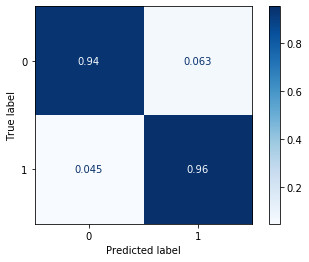

In [127]:
plot_confusion_matrix(extra_trees, test_vec, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

In [10]:
param_grid = {'max_depth':np.arange(1,50),
              'max_features':np.arange(1,50),
              'min_samples_leaf':np.arange(1,50),
              'n_estimators':np.arange(100,150),
              'criterion':["gini", "entropy"]}

extra_trees_cv = GridSearchCV(extra_trees, param_grid, cv = 10, scoring='f1')

In [12]:
extra_trees_cv.best_params_

{'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 1}

In [13]:
print("F1 score for ExtraTrees:", extra_trees_cv.best_score_)

0.00011671335200746966

In [ ]:
y_pred = extra_trees_cv.predict(test_vec)

print("Accuracy for ExtraTrees:", accuracy_score(y_pred, y_test))

In [ ]:
plot_confusion_matrix(extra_trees_cv.best_estimator_, test_vec, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

## Adaboost

### Default Params

In [137]:
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

In [138]:
adaboost.fit(train_vec, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [139]:
y_pred = adaboost.predict(test_vec)

print("Default F1 Score:", f1_score(y_pred, y_test))
print("Default Accuracy Score:", accuracy_score(y_pred, y_test))

Default F1 Score: 0.9024247393698019
Default Accuracy Score: 0.9059182290490174


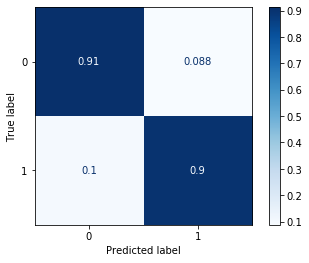

In [133]:
plot_confusion_matrix(adaboost, test_vec, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

In [16]:
param_grid = {'n_estimators':np.arange(50,100),
              'learning_rate': np.arange(0.1, 2.1, 0.1),
              'min_samples_leaf':np.arange(1,50)}

adaboost_cv = GridSearchCV(adaboost, param_grid, cv = 10, scoring='f1')

In [131]:
adaboost_cv.fit(train_vec, y_train)

NameError: name 'adaboost_cv' is not defined

In [ ]:
adaboost_cv.best_params_

In [ ]:
print("F1 score for Adaboost:", adaboost_cv.best_score_)

In [ ]:
y_pred = adaboost_cv.predict(test_vec)

print("Accuracy for Adaboost:", accuracy_score(y_pred, y_test))

In [ ]:
plot_confusion_matrix(adaboost_cv.best_estimator_, test_vec, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

# ***Modeling based on Text***

In [153]:
X_train,X_test,y_train,y_test = train_test_split(news_data['text'], news_data['label'], test_size = 0.2, stratify = news_data['label'], random_state = 7)

In [162]:
vectorizer = TfidfVectorizer(stop_words='english')

In [163]:
train_vec_text = vectorizer.fit_transform(X_train)
test_vec_text = vectorizer.transform(X_test)

## Decision Tree

### Default Params

In [164]:
decision_tree_text = DecisionTreeClassifier(random_state = 7)  

In [166]:
decision_tree_text.fit(train_vec_text, y_train)   
y_pred = decision_tree_text.predict(test_vec_text)

In [167]:
print("Default F1 Score:", f1_score(y_pred, y_test))
print("Default Accuracy Score:", accuracy_score(y_pred, y_test))

Default F1 Score: 0.995200749151352
Default Accuracy Score: 0.9953693245990513


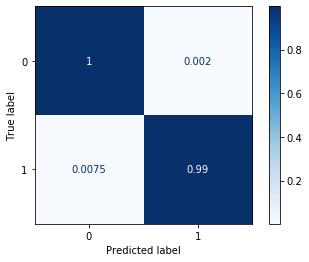

In [175]:
plot_confusion_matrix(decision_tree_text, test_vec_text, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

## ExtraTrees

### Default Params

In [169]:
extra_trees_text = ExtraTreesClassifier(random_state = 7)

In [171]:
extra_trees_text.fit(train_vec_text, y_train)
y_pred = extra_trees_text.predict(test_vec_text)

In [172]:
print("Default F1 Score:", f1_score(y_pred, y_test))
print("Default Accuracy Score:", accuracy_score(y_pred, y_test))

Default F1 Score: 0.9831414951749795
Default Accuracy Score: 0.9836232211429862


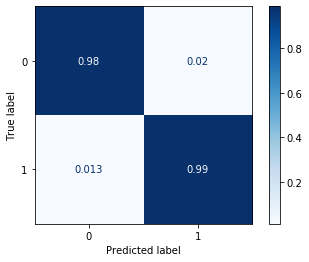

In [174]:
plot_confusion_matrix(extra_trees_text, test_vec_text, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

In [176]:
adaboost_text = AdaBoostClassifier(base_estimator = decision_tree_text ,random_state=7)

In [177]:
adaboost_text.fit(train_vec_text, y_train)
y_pred = adaboost_text.predict(test_vec_text)

In [178]:
print("Default F1 Score:", f1_score(y_pred, y_test))
print("Default Accuracy Score:", accuracy_score(y_pred, y_test))

Default F1 Score: 0.9963772350122706
Default Accuracy Score: 0.9964987576236729


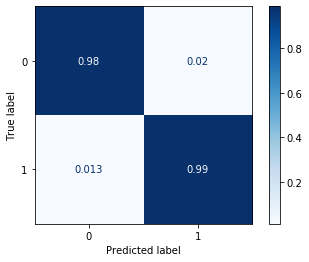

In [179]:
plot_confusion_matrix(extra_trees_text, test_vec_text, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()